# Part 1 Data Analysis

## Part 1.1 Dataset Analysis for Significant Predictors Identification


In [1]:
import openpyxl
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Imporot excel file of the dataset
df = pd.read_excel("Anonymized Data for Data Interns.xlsx")
df.head()

,DT,ID,Sch,SiteName,Days Enr SY21_22,Days Present SY21_22,Days Abs SY21_22,Att Rate\n SY21_22,AttGrp\n SY21_22,Days Enr SY22_23,...,Special Ed,Cumulative Weighted Total GPA,Current Weighted Total GPA,ZipResidence,Contact Person 1 (Primary Contact),Contact Email 1 (Email of Contact Person 1),Contact Number 1 (Phone Number of Contact Person 1),Contact Person 2 (Secondary Contact),Contact Email 2 (Email of Contact Person 2),Contact Number 2 (Phone Number of Contact Person 2)
0,2024-05-23,277629,204,West Oakland Middle School,180,59,121,0.328,Severe Chronic Absent,180.0,...,Not Special Ed,1.10,0.37,94607,YES,YES,YES,YES,YES,YES
1,2024-05-23,279268,204,West Oakland Middle School,180,168,12,0.933,At Risk,67.0,...,Not Special Ed,3.27,3.72,94607,YES,YES,YES,NO,NO,NO
2,2024-05-23,279449,204,West Oakland Middle School,180,153,27,0.850,Moderate Chronic Absent,180.0,...,Not Special Ed,2.64,2.99,94607,YES,NO,NO,YES,YES,NO
3,2024-05-23,279753,204,West Oakland Middle School,180,159,21,0.883,Moderate Chronic Absent,180.0,...,Not Special Ed,2.82,3.13,94609,YES,NO,NO,YES,YES,YES
4,2024-05-23,279921,204,West Oakland Middle School,71,35,36,0.493,Severe Chronic Absent,NaN,...,Not Special Ed,1.21,1.21,94609,YES,YES,NO,NO,NO,NO


In [3]:
# Find column labels useful for finding correlation between severe chronic absenteeism and different factors in columns
df.columns
print("Potential Significant Predictors: ", list(df.columns[4:27]))

Potential Significant Predictors:  ['Days Enr SY21_22', 'Days Present SY21_22', 'Days Abs SY21_22', 'Att Rate\n SY21_22', 'AttGrp\n SY21_22', 'Days Enr SY22_23', 'Days Present SY22_23', 'Days Abs SY22_23', 'Att Rate\n SY22_23', 'AttGrp\n SY22_23', 'Days Enr SY23_24', 'Days Present SY23_24', 'Days Abs SY23_24', 'Att Rate\n SY23_24', 'AttGrp\n SY23_24', 'Grade\nSY23_24', 'Gen', 'Ethnicity', 'Fluency', 'HomeLang', 'SED Status', 'Special Ed', 'Cumulative Weighted Total GPA']


### Data Cleaning and Analysis

In [4]:
# Missing values within the table
df[df.isnull().any(axis=1)].head()

,DT,ID,Sch,SiteName,Days Enr SY21_22,Days Present SY21_22,Days Abs SY21_22,Att Rate\n SY21_22,AttGrp\n SY21_22,Days Enr SY22_23,...,Special Ed,Cumulative Weighted Total GPA,Current Weighted Total GPA,ZipResidence,Contact Person 1 (Primary Contact),Contact Email 1 (Email of Contact Person 1),Contact Number 1 (Phone Number of Contact Person 1),Contact Person 2 (Secondary Contact),Contact Email 2 (Email of Contact Person 2),Contact Number 2 (Phone Number of Contact Person 2)
4,2024-05-23,279921,204,West Oakland Middle School,71,35,36,0.493,Severe Chronic Absent,NaN,...,Not Special Ed,1.21,1.21,94609,YES,YES,NO,NO,NO,NO
10,2024-05-23,281507,204,West Oakland Middle School,173,155,18,0.896,Moderate Chronic Absent,NaN,...,Not Special Ed,1.29,1.37,94607,YES,NO,NO,YES,YES,NO
47,2024-05-23,375373,204,West Oakland Middle School,173,158,15,0.913,At Risk,NaN,...,Not Special Ed,0.63,0.48,94607,YES,NO,NO,YES,YES,NO
48,2024-05-23,376294,204,West Oakland Middle School,178,145,33,0.815,Moderate Chronic Absent,23.0,...,Not Special Ed,1.63,1.24,94607,YES,NO,YES,YES,YES,NO
53,2024-05-23,376683,204,West Oakland Middle School,109,103,6,0.945,At Risk,NaN,...,Not Special Ed,2.96,3.30,94608,NO,NO,YES,YES,YES,YES


In [5]:
# Duplicats
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")
if duplicates.sum() > 0:
    print("Duplicate Rows: ", df[duplicates])
else:
    print("No Duplicates found")

Number of duplicate rows: 0
No Duplicates found


In [6]:
# Inconsistent Data Types
print("Data Types per column: ", df.dtypes)

Data Types per column:  DT                                                     datetime64[ns]
ID                                                              int64
Sch                                                             int64
SiteName                                                       object
Days Enr SY21_22                                                int64
Days Present SY21_22                                            int64
Days Abs SY21_22                                                int64
Att Rate\n SY21_22                                            float64
AttGrp\n SY21_22                                               object
Days Enr SY22_23                                              float64
Days Present SY22_23                                          float64
Days Abs SY22_23                                              float64
Att Rate\n SY22_23                                            float64
AttGrp\n SY22_23                                               obj

### Observation
What I noticed from the table is that there are kids that were present at certain year of the school and were also absent for different period of time. This is understandable because some students may have transfered into West Oakland Middle School at a different point of time. Therefore I calculated a new attendance rate out of the only time that the students were enrolled in school.

I replaced all the missing values with 0 because the only columns that contained null values were numerical data set that demonstrated the days of enrollment, presence, absence.

In [7]:
# Fill out Null (NaN) values
df = df.fillna(0)

In [8]:
df.isnull().all(axis=0)
# Double checking if I filled all the missing values

DT                                                     False
ID                                                     False
Sch                                                    False
SiteName                                               False
Days Enr SY21_22                                       False
Days Present SY21_22                                   False
Days Abs SY21_22                                       False
Att Rate\n SY21_22                                     False
AttGrp\n SY21_22                                       False
Days Enr SY22_23                                       False
Days Present SY22_23                                   False
Days Abs SY22_23                                       False
Att Rate\n SY22_23                                     False
AttGrp\n SY22_23                                       False
Days Enr SY23_24                                       False
Days Present SY23_24                                   False
Days Abs SY23_24        

### Data Cleaning

#### In order to make the observation easier and simpler, I converted the separate enrollment, presence, and absence data that were separated by years into a one total sum of enrollment days, present days, and absent days
Using the new total days fn enrollment, presence, and absence, I calculated total attendance rate for each students. 

In [9]:
# TED = Total Enrolled Days
df['TED'] = df['Days Enr SY21_22'] + df['Days Enr SY22_23'] + df['Days Enr SY23_24']
# TAD = Total Absent Days
df['TAD'] = df['Days Abs SY21_22'] + df['Days Abs SY22_23'] + df['Days Abs SY23_24']
# TPD = Total Present Days
df['TPD'] = df['Days Present SY21_22'] + df['Days Present SY22_23'] + df['Days Present SY23_24']

In [10]:
# Total Attendance Rate in decimal format
df['Total_Att_rt'] = df['TPD'] / df['TED']
#  Severe Chronic Absenteeism indicator
# 1 Represents Severe Chronic Absenteeism Attendance Group and 0 Represents Non Severe Chronic Absenteeism Attendance Group
df['SCA'] = [1 if i <= 0.8 else 0 for i in df['Total_Att_rt']] # Severe chronic absenteeism is defined as students with 80% and below attendance rate

In [11]:
# Dropped all the columns of individual attendance rate from yr 21 to 22, 22 to 23, and 23 to 24
df = df.drop(['Days Enr SY21_22', 'Days Present SY21_22', 'Days Abs SY21_22', 'Att Rate\n SY21_22', 'AttGrp\n SY21_22',
             'Days Enr SY22_23', 'Days Present SY22_23', 'Days Abs SY22_23', 'Att Rate\n SY22_23', 'AttGrp\n SY22_23',
             'Days Enr SY23_24', 'Days Present SY23_24', 'Days Abs SY23_24', 'Att Rate\n SY23_24', 'AttGrp\n SY23_24'], axis=1)
df.head()

,DT,ID,Sch,SiteName,Grade\nSY23_24,Gen,Ethnicity,Fluency,HomeLang,SED Status,...,Contact Email 1 (Email of Contact Person 1),Contact Number 1 (Phone Number of Contact Person 1),Contact Person 2 (Secondary Contact),Contact Email 2 (Email of Contact Person 2),Contact Number 2 (Phone Number of Contact Person 2),TED,TAD,TPD,Total_Att_rt,SCA
0,2024-05-23,277629,204,West Oakland Middle School,8,M,African American,EO,English,SED,...,YES,YES,YES,YES,YES,540.0,349.0,191.0,0.353704,1
1,2024-05-23,279268,204,West Oakland Middle School,8,F,White,RFEP,Arabic,SED,...,YES,YES,NO,NO,NO,427.0,33.0,394.0,0.922717,0
2,2024-05-23,279449,204,West Oakland Middle School,8,F,White,RFEP,Arabic,SED,...,NO,NO,YES,YES,NO,540.0,74.0,466.0,0.862963,0
3,2024-05-23,279753,204,West Oakland Middle School,7,M,Latino,EO,English,SED,...,NO,NO,YES,YES,YES,540.0,84.0,456.0,0.844444,0
4,2024-05-23,279921,204,West Oakland Middle School,7,F,Latino,EO,English,SED,...,YES,NO,NO,NO,NO,142.0,72.0,70.0,0.492958,1


The factors considered to be have high correlation with severe chronic absenteeism are Ethnicity, Gender, Fluency, SED Status, Special education status, Cumulative Weighted Total GPA, Current Weighted GPA, attendance rate, and family background.
<br>
However, there were other factors to consider such as family household indicators of students coming from single parent or no parents, which led to adding two more columns called 'single_parent' and 'orphan'.

Assuming based on availability of primary and secondary contact information of parent, determined the household structure that the students come from: 
<br>
- If only one of the contact information have been filled out, identified as single parent household.
- If none of the contact information have been filled out, identified as an orphan.

In [12]:
df['single_parent'] = ((df['Contact Person 1 (Primary Contact)'] == 'YES') & (df['Contact Person 2 (Secondary Contact)'] == 'NO')) | \
                      ((df['Contact Person 1 (Primary Contact)'] == 'NO') & (df['Contact Person 2 (Secondary Contact)'] == 'YES'))

# Convert boolean values to integers (1 for True, 0 for False)
df['single_parent'] = df['single_parent'].astype(int)

In [13]:
df['orphan'] = ((df['Contact Person 1 (Primary Contact)'] == 'NO') & (df['Contact Person 2 (Secondary Contact)'] == 'NO')) | \
                      ((df['Contact Person 1 (Primary Contact)'] == 'NO') & (df['Contact Person 2 (Secondary Contact)'] == 'NO'))
df['orphan'] = df['orphan'].astype(int)

Dropped all the columns that won't be used in correlation analysis. Further changed the string values for columns: [SED Status and Sepcial Ed] to binary values of 1's and 0's. 
<br>
1's indicate affirmation while 0 doesn't.
<br>
Changed the column values of 'Gen' into binary data with 1's indicating Male and 0's indicating Female.
<br>
1's indicated English of HomeLang and 0's indicated anything other than English.
<br>
For Ethnicity, 1's indicate  white while 0's indicate other ethnicities.

In [14]:
# Data Transformation
df['SED Status'] = df['SED Status'].apply(lambda x: 1 if x == 'SED' else 0)
df['Special Ed'] = df['Special Ed'].apply(lambda x: 1 if x == 'Special Ed' else 0)
df['Gen'] = df['Gen'].apply(lambda x: 1 if x == 'M' else 0)
df['HomeLang'] = df['HomeLang'].apply(lambda x: 1 if x == 'English' else 0)
df['Ethnicity'] = df['Ethnicity'].apply(lambda x: 1 if x == 'White' else 0)

In [15]:
df.drop('DT', axis=1, inplace =True) # removing columns from DT
df.drop('Fluency', axis=1, inplace=True) # removing Fluency column
df.drop(['ZipResidence', 'Contact Person 1 (Primary Contact)', 'Contact Email 1 (Email of Contact Person 1)', 
         'Contact Number 1 (Phone Number of Contact Person 1)', 'Contact Person 2 (Secondary Contact)', 
         'Contact Email 2 (Email of Contact Person 2)', 'Contact Number 2 (Phone Number of Contact Person 2)'], axis=1, 
        inplace=True)
# removing columts from ZipResidence to Contact Number 2 (Phone Number of Contact Person 2)
df.drop(['Sch', 'SiteName', 'Grade\nSY23_24'], axis=1, inplace=True) # removing school, sitename, and year of students in 2023 to 2024
df.head()

,ID,Gen,Ethnicity,HomeLang,SED Status,Special Ed,Cumulative Weighted Total GPA,Current Weighted Total GPA,TED,TAD,TPD,Total_Att_rt,SCA,single_parent,orphan
0,277629,1,0,1,1,0,1.10,0.37,540.0,349.0,191.0,0.353704,1,0,0
1,279268,0,1,0,1,0,3.27,3.72,427.0,33.0,394.0,0.922717,0,1,0
2,279449,0,1,0,1,0,2.64,2.99,540.0,74.0,466.0,0.862963,0,0,0
3,279753,1,0,1,1,0,2.82,3.13,540.0,84.0,456.0,0.844444,0,0,0
4,279921,0,0,1,1,0,1.21,1.21,142.0,72.0,70.0,0.492958,1,1,0


### Exploratory Data Analysis
Using Correlation heatmap, I narrowed down to significant predictors to few that had high correlation with Severe Chronia Absenteeism

In [16]:
# Columns used for correlation Analysis
interest_columns = df.columns[1::] # Exclude ID for being a qualitative data
interest_columns

Index(['Gen', 'Ethnicity', 'HomeLang', 'SED Status', 'Special Ed',
       'Cumulative Weighted Total GPA', 'Current Weighted Total GPA', 'TED',
       'TAD', 'TPD', 'Total_Att_rt', 'SCA', 'single_parent', 'orphan'],
      dtype='object')

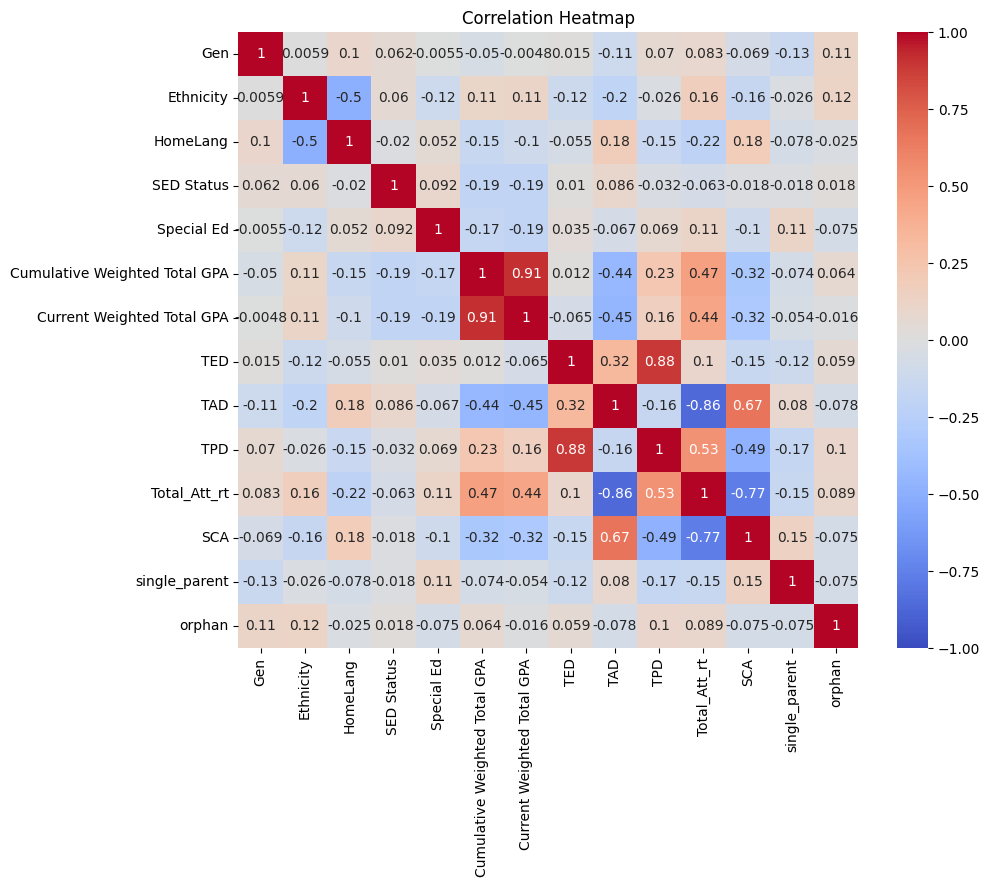

In [17]:
# Drawing Correlation Heatmap
correlation_matrix = df[interest_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True)

plt.title("Correlation Heatmap")
plt.show()

In [18]:
# List of Correlation between SCA vs. Other Factors
correlation_matrix['SCA'].sort_values(ascending=False)

SCA                              1.000000
TAD                              0.665571
HomeLang                         0.182133
single_parent                    0.146992
SED Status                      -0.018076
Gen                             -0.069452
orphan                          -0.074808
Special Ed                      -0.101802
TED                             -0.152923
Ethnicity                       -0.162619
Current Weighted Total GPA      -0.319696
Cumulative Weighted Total GPA   -0.324109
TPD                             -0.488981
Total_Att_rt                    -0.770738
Name: SCA, dtype: float64

### Interpreting Key correlations between SCA(Severe Chronic Absenteeism Indicator ) vs. other factors

##### Top Correlations with SCA:
1. Attendance Rate (Total_Att_rt)

	•	Correlation: Strong negative correlation (-0.77)
	•	Interpretation: A lower attendance rate is strongly correlated with higher levels of severe chronic absenteeism. This indicates that students with poor attendance are much more likely to be classified as severely chronically absent. The strength of this correlation highlights that attendance rate is one of the most significant factors in predicting absenteeism, as students who consistently miss school are more prone to falling into the severe absenteeism category.

2. Cumulative and Current Weighted GPA

	•	Correlation: Both GPAs show a moderate negative correlation (-0.32)
	•	Interpretation: Students with lower cumulative and current GPAs are more likely to be categorized as severely chronically absent. The moderate negative correlation suggests that academic struggles are linked to higher absenteeism rates. This relationship is logical, as students who perform poorly in school may feel less motivated to attend regularly and are at greater risk of disengagement from their academic environment.

3. Single Parent Status

	•	Correlation: Weak positive correlation (0.15)
	•	Interpretation: Students from single-parent households exhibit a slightly higher likelihood of severe chronic absenteeism, although the correlation is weak. This indicates that while family structure may play a role, it is not a dominant predictor of absenteeism. Factors related to single-parent status, such as fewer resources or support systems, may contribute to this outcome, but the overall impact on absenteeism is limited.

##### Focus of the Analysis

In this analysis, obvious factors such as total days absent or total days present, which are expected to have clear correlations with the SCA indicator, were intentionally omitted. Instead, the focus was placed on identifying less apparent insights that could inform intervention strategies. These findings suggest that attendance rates, academic performance, and family structure contribute to chronic absenteeism in varying degrees, with attendance rate and GPA showing the strongest predictive relationships.


##### Key Takeaways:
The strongest predictors of severe chronic absenteeism (SCA) are:
- Total Attendance Rate (negative correlation): Students with lower attendance rates are at higher risk of absenteeism.
- GPA (negative correlation): Lower GPA students are more likely to be severely absent.
- Family structure (single parent) and special education status show weak correlations with absenteeism, indicating these are not the strongest factors but may still contribute to certain cases.
- Socio-economic status and other variables like language fluency may not play a significant role based on the heatmap results.

These correlations can guide interventions by targeting students with low attendance rates, high absenteeism, and low GPAs to improve overall attendance rates.

In [19]:
# Log Regression between Attendance Rate vs. SCA
X = df[['Total_Att_rt']]  
y = df['SCA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[22  0]
 [ 4  2]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        22
           1       1.00      0.33      0.50         6

    accuracy                           0.86        28
   macro avg       0.92      0.67      0.71        28
weighted avg       0.88      0.86      0.83        28



In [20]:
coefficients = pd.DataFrame({
    'Variable': ['Total_Att_rt'],
    'Coefficient': logreg.coef_[0]
})

print("Logistic Regression Coefficients:")
print(coefficients)

Logistic Regression Coefficients:
       Variable  Coefficient
0  Total_Att_rt    -3.454519


In [21]:
# Log Regression between Single Parent vs. SCA
X = df[['single_parent']]  
y = df['SCA']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[22  0]
 [ 6  0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        22
           1       0.00      0.00      0.00         6

    accuracy                           0.79        28
   macro avg       0.39      0.50      0.44        28
weighted avg       0.62      0.79      0.69        28



/Users/marksmacbookair/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marksmacbookair/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/marksmacbookair/miniconda/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

##### Confusion Matrix:
- True Negatives (TN) = 22: The model correctly predicted 22 students as not severely chronically absent.
- False Positives (FP) = 0: The model did not incorrectly predict any students as severely chronically absent.
- False Negatives (FN) = 6: The model incorrectly predicted all 6 students who were actually severely absent as not severely absent.
- True Positives (TP) = 0: The model failed to predict any students as severely chronically absent.
##### Classification Result:
Class 0 (Not Severely Chronically Absent):

- Precision: 0.79 – Out of all students predicted as not severely absent, 79% were correctly classified.
- Recall: 1.00 – The model correctly identified all students who were not severely absent (perfect recall).
- F1-Score: 0.88 – A strong F1-score reflects good balance between precision and recall for class 0.

Class 1 (Severely Chronically Absent):

- Precision: 0.00 – No students were predicted as severely absent, resulting in a precision of zero for this class.
- Recall: 0.00 – The model failed to identify any of the actual severely absent students, leading to a recall of zero.
- F1-Score: 0.00 – Since there were no correct predictions for class 1, the F1-score is zero, meaning the model fails to classify severely absent students altogether.

Overall Model Performance:

Accuracy: The overall accuracy of the model is 79%, meaning it correctly classified 79% of the students. However, this result is heavily skewed by the fact that the model only correctly identifies students who are not severely chronically absent (Class 0).
<br>
<br>
Macro Average:
- Precision: 0.39 – On average, the model’s precision across both classes is quite low, due to its inability to correctly classify any students as severely absent.
- Recall: 0.50 – The recall across both classes shows that the model is perfect at classifying class 0 but completely fails for class 1, resulting in an average recall of 50%.
<br>
<br>
Weighted Average:
- Precision: 0.62 – The precision is weighed heavily by the larger number of true negatives.
- Recall: 0.79 – Overall recall reflects the fact that the model is performing well for the majority class (Class 0).
- F1-Score: 0.69 – The weighted F1-score balances the precision and recall of both classes, but it is driven down by the model’s failure to identify students in Class 1.

Key Takeaways:

1. Strong Performance for Class 0 (Not Severely Absent):
- The model performs well at identifying students who are not severely chronically absent (Class 0). It has a high recall (100%) and reasonable precision (79%), meaning it correctly classifies all non-severely absent students.
2.	Failure for Class 1 (Severely Absent):
- The model completely fails to identify any students as severely chronically absent (Class 1). Both precision and recall are 0, meaning the model never predicts the positive class (SCA = 1). This results in a poor overall F1-score for Class 1 and severely limits the model’s utility for identifying students at risk of severe absenteeism.
3.	Class Imbalance:
- The poor performance for Class 1 could be due to class imbalance, where there are significantly more students in Class 0 than Class 1. Logistic regression models can struggle to identify the minority class (SCA = 1) in imbalanced datasets, leading to the model predicting only the majority class (Class 0).
4.	Accuracy is Misleading:
- While the model’s accuracy is 79%, this is misleading because it is driven entirely by the correct classification of Class 0 students. The model’s inability to classify any Class 1 students shows that accuracy alone is not a good metric to evaluate this model.
- Notice there is an error message, "recision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior". This causes for further adjustment in the model.

In [28]:
# Logarithmic Regression between most significant predictors vs. SCA
X = df[['single_parent', 'Cumulative Weighted Total GPA', 'Current Weighted Total GPA', 'Total_Att_rt']]  # Adjust with relevant features
y = df['SCA']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg.fit(X_train, y_train)

# Predict outcomes and evaluate the model
y_pred = logreg.predict(X_test)

# Evaluate the model
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Confusion Matrix:
[[22  0]
 [ 3  3]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        22
           1       1.00      0.50      0.67         6

    accuracy                           0.89        28
   macro avg       0.94      0.75      0.80        28
weighted avg       0.91      0.89      0.88        28



##### Confusion Matrix:
- True Negatives (TN) = 22: The model correctly predicted 22 students as not severely chronically absent.
- False Positives (FP) = 0: The model did not incorrectly classify any students as severely chronically absent.
- False Negatives (FN) = 3: The model incorrectly classified 3 students as not severely absent, when they actually were.
- True Positives (TP) = 3: The model correctly classified 3 students as severely chronically absent.
<br>
##### Classification Report:
Class 0 (Not Severely Chronically Absent):
- Precision: 0.88 – Of all students predicted as not severely absent, 88% were correctly classified.
- Recall: 1.00 – The model correctly identified all students who were not severely absent (perfect recall).
- F1-Score: 0.94 – A high F1-score shows that the model performs very well at classifying non-severely absent students.

Class 1 (Severely Chronically Absent):
- Precision: 1.00 – Out of all students predicted as severely absent, 100% were correctly classified (no false positives).
- Recall: 0.50 – The model correctly identified 50% of students who were actually severely absent. It missed 3 out of the 6 actual SCA students.
- F1-Score: 0.67 – The F1-score for Class 1 reflects a balance between perfect precision and moderate recall.

Overall Model Performance:
- Accuracy: The overall accuracy of the model is 89%, meaning the model correctly classified 89% of the students. This shows strong performance overall.
- Macro Average:
- Precision: 0.94 – On average, the precision across both classes is high, particularly driven by the perfect precision for Class 1 (SCA).
- Recall: 0.75 – The average recall across both classes reflects that the model is perfect at classifying Class 0 but only 50% effective for Class 1.
- F1-Score: 0.80 – This shows that the model is generally performing well across both classes but is still missing some students in Class 1.
- Weighted Average:
- Precision: 0.91 – The precision weighted by the number of samples in each class shows strong overall performance, particularly driven by the accurate classification of Class 0.
- Recall: 0.89 – The model has high recall overall but is affected by the lower recall for Class 1.
- F1-Score: 0.88 – The weighted F1-score indicates that the model is performing well overall but still has room for improvement in identifying all students who are severely chronically absent.

Key Takeaways:
1.	Strong Performance for Class 0 (Not Severely Absent):
- The model performs very well at identifying students who are not severely chronically absent. The precision, recall, and F1-score are all high, indicating that the model correctly classifies the majority of students in this group.
2.	Improved Performance for Class 1 (Severely Absent):
- Compared to previous models, the model is now able to correctly identify 50% of severely absent students. This is a significant improvement, although there are still 3 students that the model fails to classify as severely chronically absent.
- Perfect precision for Class 1 means that whenever the model predicts a student is severely absent, it is always correct. However, the recall of 0.50 suggests that the model is still missing half of the severely absent students.
3.	Balanced Overall Accuracy:
- The model’s overall accuracy of 89% is quite strong, suggesting good general performance. However, the lower recall for Class 1 indicates that the model may still need to improve in terms of identifying all students who are at risk of severe absenteeism.

## 1.2 Summary on Findings: Predictors of Severe Chronic Absenteeism
##### Objective:

Using statistical analysis and logistic regression, explored various factors, such as attendance rates, GPA, family structure, and socio-economic indicators, to understand their correlation with severe chronic absenteeism.

##### Key Predictors of Severe Chronic Absenteeism
1.	Total Attendance Rate (Total_Att_rt)
- Correlation: Strong negative correlation (-0.77) with SCA.
- Relevance: Unsurprisingly, attendance rate is the strongest predictor of severe chronic absenteeism. Students with lower attendance rates are much more likely to be classified as severely chronically absent. This negative correlation is highly significant, as it highlights that students who are consistently missing school are at the highest risk for severe absenteeism.
- Statistical Insight: Logistic regression confirmed that Total_Att_rt had one of the largest effects on predicting SCA, as evidenced by the strong negative correlation and its high predictive power in the model. This finding aligns with existing literature on absenteeism, where lower attendance rates are a direct reflection of the issue being studied.
2.	Cumulative and Current Weighted GPA
- Correlation: Moderate negative correlation (-0.32) for both cumulative and current GPA.
- Relevance: Both cumulative and current GPA were found to be moderately negatively correlated with severe absenteeism. Students with lower academic performance are more likely to be classified as severely absent. This suggests that students who struggle academically may feel less engaged with school and are more likely to avoid attending, further exacerbating the issue.
- Statistical Insight: In the logistic regression model, the coefficients for Cumulative Weighted Total GPA (-0.468) and Current Weighted Total GPA (-0.306) confirmed that academic performance has a significant, though moderate, effect on absenteeism. Lower GPAs increase the likelihood of a student being classified as severely absent, as students with poor grades are at greater risk of disengagement from school.
3.	Single Parent Status
- Correlation: Weak positive correlation (+0.15) with SCA.
- Relevance: Although the correlation between single-parent households and absenteeism was weak, it was still significant enough to warrant attention. Students from single-parent households may face more challenges in maintaining regular school attendance due to various factors, such as limited family support or financial constraints. While this factor is not a strong predictor on its own, it contributes to absenteeism in combination with other variables.
- Statistical Insight: Logistic regression showed that Single Parent Status had a relatively small but positive impact on the likelihood of being classified as severely absent. While not a dominant factor, it suggests that family structure should be considered when identifying students at risk for absenteeism.


##### Statistical Models and Insights

- Logistic Regression was used to assess the impact of the various predictors on severe chronic absenteeism. The regression coefficients showed that Total Attendance Rate had the strongest negative effect, while GPA also demonstrated moderate negative correlations.
- The confusion matrix and classification report of the logistic regression model indicated that the model performed well at identifying students who were not severely absent, but it had some difficulty identifying all severely absent students, with a recall for Class 1 (SCA) of 50%. This indicates that while the model successfully identifies many at-risk students, some severely absent students may still go undetected.

##### Conclusion and Relevance of Findings

The analysis revealed that the strongest predictors of severe chronic absenteeism are:
1.	Total Attendance Rate
2.	GPA (Cumulative and Current)
3.	Single Parent Status.

These findings highlight that attendance rate and academic performance are the most critical factors in predicting absenteeism. Interventions targeting students with low attendance rates and poor academic performance, combined with support for students from single-parent households, can significantly reduce absenteeism and improve overall attendance rates.

# Part 2 Intervention Proposal
## 2.1 Identifying Students for Targeted Intervention
Based on the predictors identified in Part 1, students who are at risk of becoming severely chronically absent but have not yet crossed the threshold of 10% absenteeism.

In [23]:
# Filtered students with attendance rate between 81% and 90% (at risk but not severely absent) because 80% would fall into the SCA category
at_risk_students = df[(df['Total_Att_rt'] > 0.80) & (df['Total_Att_rt'] <= 0.90)]

# Further refine by selecting students with low GPA or single parent status; (According to US Census, aerage GPA of 2.5 is equal to C- average)
at_risk_students = at_risk_students[(at_risk_students['Cumulative Weighted Total GPA'] < 2.5) | (at_risk_students['single_parent'] == 1)]

# IDs of at-risk students
at_risk_student_ids = at_risk_students['ID']
at_risk_students.head()

,ID,Gen,Ethnicity,HomeLang,SED Status,Special Ed,Cumulative Weighted Total GPA,Current Weighted Total GPA,TED,TAD,TPD,Total_Att_rt,SCA,single_parent,orphan
9,281378,1,0,1,1,0,2.03,2.03,540.0,57.0,483.0,0.894444,0,0,0
10,281507,1,0,0,1,0,1.29,1.37,346.0,36.0,310.0,0.895954,0,0,0
12,281677,0,0,1,1,0,1.99,1.73,540.0,56.0,484.0,0.896296,0,0,0
14,281758,0,1,0,1,0,2.73,1.83,540.0,56.0,484.0,0.896296,0,1,0
15,281776,0,0,1,1,0,2.07,1.58,540.0,107.0,433.0,0.801852,0,1,0


In [24]:
current_att_rt = df['Total_Att_rt'].mean() # Current overall attention rate of students
targeted_att_rt = current_att_rt + 0.06 # Targeted attendance rate by 6% increase
required_att_rt = targeted_att_rt - current_att_rt # Required attendance rate improvement
total_students = len(df) # Total Number of Students
required_student_num = total_students * required_att_rt # Required number of students to meet the targeted attendance rate

required_student_num = round(required_student_num) # Rounded the decimal number
required_student_num

8

In [25]:
# Sorted risk students by students that are most likely improve by sorting the table in Total Attendance Rate in a descending order
sorted_at_risk_students = at_risk_students.sort_values(by='Total_Att_rt', ascending=False)
sorted_at_risk_students.head(required_student_num) 

,ID,Gen,Ethnicity,HomeLang,SED Status,Special Ed,Cumulative Weighted Total GPA,Current Weighted Total GPA,TED,TAD,TPD,Total_Att_rt,SCA,single_parent,orphan
75,384369,1,0,1,1,0,3.26,2.80,540.0,55.0,485.0,0.898148,0,1,0
12,281677,0,0,1,1,0,1.99,1.73,540.0,56.0,484.0,0.896296,0,0,0
14,281758,0,1,0,1,0,2.73,1.83,540.0,56.0,484.0,0.896296,0,1,0
99,396475,1,0,0,1,0,1.97,1.93,540.0,56.0,484.0,0.896296,0,0,0
10,281507,1,0,0,1,0,1.29,1.37,346.0,36.0,310.0,0.895954,0,0,0
9,281378,1,0,1,1,0,2.03,2.03,540.0,57.0,483.0,0.894444,0,0,0
104,399064,1,0,1,1,1,1.66,1.38,540.0,59.0,481.0,0.890741,0,0,0
71,382486,0,0,0,1,0,2.40,2.42,540.0,59.0,481.0,0.890741,0,0,0


The initial method employed aimed to display the student IDs by assuming that each student would fully contribute to the overall improvement in attendance rate. However, upon further reflection, it became evident that this approach was not realistic, as each student contributes only a fraction of the total improvement, depending on the extent to which their attendance increases. While sorting students in descending order by attendance rate could be useful in identifying those more likely to show improvement, I overlooked the critical fact that **students at risk**—those with the lowest attendance rates—have the greatest potential to significantly impact the overall attendance rate. The larger the gap between a student's current attendance and 100%, the more room there is for improvement, and thus, the greater their contribution to the overall goal of increasing attendance.

In [26]:
# Revised Approach
total_students = len(df)
at_risk_students = df[(df['Total_Att_rt'] > 0.80) & (df['Total_Att_rt'] <= 0.90)]

# Calculated the total attendance improvement needed
attendance_improvement_needed = (current_att_rt + 0.06) * total_students - current_att_rt * total_students

# Calculated how much each at-risk student could improve by moving towards 100% attendance
at_risk_students['Potential_Gain'] = 1.0 - at_risk_students['Total_Att_rt']

# Sorted by potential gain and sum until the total required gain is reached
at_risk_students_sorted = at_risk_students.sort_values(by='Potential_Gain', ascending=False)
at_risk_students_sorted['Cumulative_Gain'] = at_risk_students_sorted['Potential_Gain'].cumsum()

# students needed to meet the required attendance improvement
required_students = at_risk_students_sorted[at_risk_students_sorted['Cumulative_Gain'] >= attendance_improvement_needed]

# Number of students needed
num_students_needed = len(required_students)
print(f"Number of Students to Target: {num_students_needed}")

Number of Students to Target: 3


/var/folders/m2/7_gh1lw579g6mqt5hb23bxw00000gn/T/ipykernel_4961/3096568447.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  at_risk_students['Potential_Gain'] = 1.0 - at_risk_students['Total_Att_rt']


This second approach was developed to calculate the number of students who could positively impact a 6% rise in overall student attendance. The rationale behind this method is that students with lower attendance rates have greater potential for improvement. For instance, a student with 81% attendance has a potential gain of 19%, meaning they can contribute more significantly to overall attendance improvement than a student with 90% attendance, who has only a 10% potential gain. By targeting students with lower attendance rates, this approach maximizes the overall impact, as each of these students can contribute a larger margin to the attendance rate, thus driving a more substantial improvement.

Therefore, both in realistic and effective sense, we only need 3 students to meet the targeted overall  attendance rate. 

## 2.2 Targeted Intervention Proposal 

Based on the identified at-risk students, the following interventions are proposed to help improve their attendnace. The interventions focus on addressing and resolving the root cause of absenteeism.

### 1. Academic Support for Students with Low GPA
Target Group:
Students with low GPAs 
<br>
<br>
Proposed Intervention:
1. Tutoring programs: Offer personalized academic support through tutoring or after school program to assist students who are academically strugling. Having a low GPA could result in loss of interest and lower contribution to school. Improving their academic performance can motivate students to attend school more regularly.
2. Mentorship: Pair each students with teacher mentors or counselors who can constantly monitor and advise individual students academic progress. The mentors could also provide personalized support to help them succeed in school.

### 2. Parental Engagement for Students from Single-Parent Households
Target Group:
Students from single-parent households
<br>
<br>
Proposed Intervention:
1. Parent-Teacher Conferences: Schedule regular meetings between parents and teachers to discuss the student's progress and needs to overcome any potential barriers to attendance (both financially and physically).
2. Family Support Programs: School or counselors can introduce or provide access to family counseling program or parenting workshops to help single parents manage the challenges that may affect their child's school attendance.

### 3. Socio-Economic Support for Students with SED Status
Target Group: 
Students identified as socio-economically disadvantaged (SED)
<br>
<br>
Proposed Intervention:
1. Free Meals Program: Offer free breakfast and lunch to ensure that students' basic nutritional needs are met. This may also provide motive and drive for students to come to school for free meal.
2. Transportation Assistance: Provide transportation vouchers or school bus services for students who reside at distant areas from school or physciall/financially limited from accessing reliable transportation.
3. Schoool Supplies: Offer free supplies to remove financial barrier in learning. 


## 2.3 List of Identified Students

In [27]:
# List of ID numbers of the students identified as needing targeted interventions to improve the attendance rate by 6%.
target_student_id = list(required_students['ID'])
print(f"Targeted Student IDs: {target_student_id}")


Targeted Student IDs: [281677, 412071, 384369]
